In [835]:
# Importing necessary libraries
import pandas as pd                 # To read and manipulate data
import numpy as np                  # To perform mathematical operations
import matplotlib.pyplot as plt     # To plot the graphs
import seaborn as sns               # To plot the graphs
import chardet                      # To detect the encoding of the file
import datetime                     # To perform operations on date and time

In [836]:
# Importing the dataset berlin_districts.csv
dataset_berlin = pd.read_csv('../data/berlin_districts.csv', delimiter=';')

In [837]:
# WARNING: The following code block was used for a one-time character encoding detection.
# Set this to True if you need to run the encoding detection
run_encoding_check = False

if run_encoding_check:
    with open(r'../data/fahrraddiebstahl.csv', 'rb') as file:
        print(chardet.detect(file.read()))

In [838]:
# Importing the dataset fahrraddiebstahl.csv
dataset_fahrraddiebstahl = pd.read_csv(r'../data/fahrraddiebstahl.csv', encoding='ISO-8859-1')

In [839]:
# Checking the shape of the dataset berlin_districts
dataset_berlin.shape

(12, 2)

In [840]:
# Checking the information of the dataset berlin_districts
dataset_berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bezirk_id    12 non-null     int64 
 1   bezirk_name  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [841]:
# Checking the first 3 rows of the dataset berlin_districts
dataset_berlin.head(3)

,bezirk_id,bezirk_name
0,1,Mitte
1,2,Friedrichshain-Kreuzberg
2,3,Pankow


In [842]:
# Checking missing values in dataset berlin_districts
dataset_berlin_missing=dataset_berlin.isnull().sum()
print("Total missing values in dataset_berlin:",dataset_berlin_missing.sum())

Total missing values in dataset_berlin: 0


In [843]:
# Checking duplicated rows in dataset berlin_districts
dataset_berlin_duplicated=dataset_berlin.duplicated().sum()
print("Total duplicates in dataset_berlin: ", dataset_berlin_duplicated)

Total duplicates in dataset_berlin:  0


In [844]:
# Checking distribution of bezirk_id column
dataset_berlin['bezirk_id'].value_counts()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: bezirk_id, dtype: int64

In [845]:
# Checking the shape of the dataset fahrraddiebstahl
dataset_fahrraddiebstahl.shape

(22127, 11)

In [846]:
# Checking the first 3 rows of the dataset fahrraddiebstahl
dataset_fahrraddiebstahl.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,14.01.2024,13.01.2024,17,14.01.2024,11,7300515,110,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,14.01.2024,13.01.2024,16,14.01.2024,12,8100416,999,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,14.01.2024,14.01.2024,15,14.01.2024,20,2500830,399,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [847]:
# Checking the last 3 rows of the dataset fahrraddiebstahl
dataset_fahrraddiebstahl.tail(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
22124,01.01.2023,01.01.2023,5,01.01.2023,9,4300413,1400,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
22125,01.01.2023,01.01.2023,12,01.01.2023,18,6300526,695,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
22126,01.01.2023,01.01.2023,6,01.01.2023,12,4300621,400,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [848]:
# Checking duplicated rows in dataset fahrraddiebstahl
dataset_fahrraddiebstahl_duplicated=dataset_fahrraddiebstahl.duplicated().sum()
print("Total duplicates in dataset_fahrraddiebstahl: ", dataset_fahrraddiebstahl_duplicated)

Total duplicates in dataset_fahrraddiebstahl:  50


In [849]:
# Checking information of the dataset fahrraddiebstahl
dataset_fahrraddiebstahl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22127 entries, 0 to 22126
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANGELEGT_AM            22127 non-null  object
 1   TATZEIT_ANFANG_DATUM   22127 non-null  object
 2   TATZEIT_ANFANG_STUNDE  22127 non-null  int64 
 3   TATZEIT_ENDE_DATUM     22127 non-null  object
 4   TATZEIT_ENDE_STUNDE    22127 non-null  int64 
 5   LOR                    22127 non-null  int64 
 6   SCHADENSHOEHE          22127 non-null  int64 
 7   VERSUCH                22127 non-null  object
 8   ART_DES_FAHRRADS       22127 non-null  object
 9   DELIKT                 22127 non-null  object
 10  ERFASSUNGSGRUND        22127 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


#### Dividing LOR Column to Merge Datasets

In [850]:
# Checking the data type of LOR column
dataset_fahrraddiebstahl["LOR"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 22127 entries, 0 to 22126
Series name: LOR
Non-Null Count  Dtype
--------------  -----
22127 non-null  int64
dtypes: int64(1)
memory usage: 173.0 KB


In [851]:
# Checking min and max values for LOR
print("Min value for LOR: ", dataset_fahrraddiebstahl['LOR'].min())
print("Max value for LOR: ", dataset_fahrraddiebstahl['LOR'].max())

Min value for LOR:  1100101
Max value for LOR:  12601236


# DATA PREPARATION

In [852]:
# Converting the column to strings
dataset_fahrraddiebstahl['LOR'] = dataset_fahrraddiebstahl['LOR'].astype(str)

# Adding a leading zero to 7-digit entries
dataset_fahrraddiebstahl['LOR'] = dataset_fahrraddiebstahl['LOR'].apply(lambda x: '0' + x if len(x) == 7 else x)

# Checking min and max values for LOR
print("Min value for LOR: ", dataset_fahrraddiebstahl['LOR'].min())
print("Max value for LOR: ", dataset_fahrraddiebstahl['LOR'].max())

Min value for LOR:  01100101
Max value for LOR:  12601236


In [853]:
# Creating new columns by slicing the LOR column
dataset_fahrraddiebstahl['bezirk_id'] = dataset_fahrraddiebstahl['LOR'].str[:2]
dataset_fahrraddiebstahl['PGR'] = dataset_fahrraddiebstahl['LOR'].str[2:4]
dataset_fahrraddiebstahl['BZR'] = dataset_fahrraddiebstahl['LOR'].str[4:6]
dataset_fahrraddiebstahl['PLR'] = dataset_fahrraddiebstahl['LOR'].str[6:8]

# Checking the first few rows to verify the changes
print(dataset_fahrraddiebstahl[['LOR', 'bezirk_id', 'PGR', 'BZR', 'PLR']].head())

        LOR bezirk_id PGR BZR PLR
0  07300515        07  30  05  15
1  08100416        08  10  04  16
2  02500830        02  50  08  30
3  06300634        06  30  06  34
4  07200414        07  20  04  14


In [854]:
# Converting the data type of bezirk_id to int
dataset_fahrraddiebstahl['bezirk_id'] = dataset_fahrraddiebstahl['bezirk_id'].astype(int)

# Checking the data type of bezirk_id column
dataset_fahrraddiebstahl["bezirk_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 22127 entries, 0 to 22126
Series name: bezirk_id
Non-Null Count  Dtype
--------------  -----
22127 non-null  int32
dtypes: int32(1)
memory usage: 86.6 KB


In [855]:
# Checking min and max values for bezirk_id column
print("Min value for bezirk_id: ", dataset_fahrraddiebstahl['bezirk_id'].min())
print("Max value for bezirk_id: ", dataset_fahrraddiebstahl['bezirk_id'].max())

Min value for bezirk_id:  1
Max value for bezirk_id:  12


In [856]:
# Checking distribution of bezirk_id column
dataset_fahrraddiebstahl['bezirk_id'].value_counts()

1     3321
2     3202
3     2788
4     2231
7     2168
9     1717
8     1693
6     1378
11    1365
12     978
10     647
5      639
Name: bezirk_id, dtype: int64

In [857]:
# Converting data type of bezirk_id to category
dataset_fahrraddiebstahl['bezirk_id'] = dataset_fahrraddiebstahl['bezirk_id'].astype('category')

In [858]:
# Converting the column bezirk_id to categorical data type in dataset berlin_districts
dataset_berlin['bezirk_id'] = dataset_berlin['bezirk_id'].astype('category')

In [859]:
# Printing first few rows of dataset berlin_districts
dataset_berlin.head(3)

,bezirk_id,bezirk_name
0,1,Mitte
1,2,Friedrichshain-Kreuzberg
2,3,Pankow


### Merging Data

In [860]:
# Printing the shape of dataset_berlin
print("Shape of dataset_berlin: ", dataset_berlin.shape)

# Printing the shape of dataset_fahrraddiebstahl
print("Shape of dataset_fahrraddiebstahl: ", dataset_fahrraddiebstahl.shape)

# Merging the two datasets over the column bezirk_id
dataset_berlin_fahrraddiebstahl = pd.merge(dataset_fahrraddiebstahl, dataset_berlin, on='bezirk_id', how='left')

# Printing the shape of the new dataset
print("Shape of dataset_berlin_fahrraddiebstahl: ", dataset_berlin_fahrraddiebstahl.shape)

Shape of dataset_berlin:  (12, 2)
Shape of dataset_fahrraddiebstahl:  (22127, 15)
Shape of dataset_berlin_fahrraddiebstahl:  (22127, 16)


In [861]:
# Printing head of dataset_berlin_fahrraddiebstahl
dataset_berlin_fahrraddiebstahl.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,bezirk_id,PGR,BZR,PLR,bezirk_name
0,14.01.2024,13.01.2024,17,14.01.2024,11,07300515,110,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,7,30,05,15,Tempelhof-Schöneberg
1,14.01.2024,13.01.2024,16,14.01.2024,12,08100416,999,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8,10,04,16,Neukölln
2,14.01.2024,14.01.2024,15,14.01.2024,20,02500830,399,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2,50,08,30,Friedrichshain-Kreuzberg


In [862]:
# Printing the shape of the dataset_berlin_fahrraddiebstahl
print("Shape of dataset_berlin_fahrraddiebstahl before dropping duplicates: ", dataset_berlin_fahrraddiebstahl.shape)

# Dropping duplicated rows
dataset_berlin_fahrraddiebstahl.drop_duplicates(inplace=True)

# Printing the shape of the dataset_berlin_fahrraddiebstahl
print("Shape of dataset_berlin_fahrraddiebstahl after dropping duplicates: ", dataset_berlin_fahrraddiebstahl.shape)

Shape of dataset_berlin_fahrraddiebstahl before dropping duplicates:  (22127, 16)
Shape of dataset_berlin_fahrraddiebstahl after dropping duplicates:  (22077, 16)


#### Checking ANGELEGT_AM column

In [863]:
# Changing the data type of ANGELEGT_AM to datetime
dataset_berlin_fahrraddiebstahl['ANGELEGT_AM'] = pd.to_datetime(dataset_berlin_fahrraddiebstahl['ANGELEGT_AM'], format='%d.%m.%Y')

# Approving the change of data type for ANGELEGT_AM column
dataset_berlin_fahrraddiebstahl["ANGELEGT_AM"].info()

<class 'pandas.core.series.Series'>
Int64Index: 22077 entries, 0 to 22126
Series name: ANGELEGT_AM
Non-Null Count  Dtype         
--------------  -----         
22077 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 345.0 KB


In [864]:
# Checking min and max values for ANGELEGT_AM
print("Min value for ANGELEGT_AM: ", dataset_berlin_fahrraddiebstahl['ANGELEGT_AM'].min())
print("Max value for ANGELEGT_AM: ", dataset_berlin_fahrraddiebstahl['ANGELEGT_AM'].max())

Min value for ANGELEGT_AM:  2023-01-01 00:00:00
Max value for ANGELEGT_AM:  2024-01-14 00:00:00


In [865]:
# Creating a function for plotting histograms
def plot_histogram(data, column, bins, figsize, mean_line=True, median_line=True, season_lines=False):
    """
    Plots a histogram for a specified column in the dataset.

    :param data: DataFrame containing the data.
    :param column: Column name for which the histogram is to be plotted.
    :param bins: Number of bins in the histogram.
    :param figsize: Size of the figure.
    :param mean_line: Boolean to indicate if a line for the mean should be plotted.
    :param median_line: Boolean to indicate if a line for the median should be plotted.
    :param season_lines: Boolean to indicate if lines for seasons should be plotted.
    """
    data[column].hist(bins=bins, figsize=figsize)

    # Adding Red lines for the mean and median
    if mean_line:
        plt.axvline(data[column].mean(), color='red', linestyle='dashed', linewidth=1)
    
    # Adding Red lines for the mean and median
    if median_line:
        plt.axvline(data[column].median(), color='red', linestyle='dashed', linewidth=1)

    # Adding Yellow lines for seasons
    if season_lines:
        for date in ['2023-03-20', '2023-06-20', '2023-09-22', '2023-12-21']:
            plt.axvline(pd.to_datetime(date), color='yellow', linestyle='dashed', linewidth=1)
    
    # Adding title as well as x and y labels
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

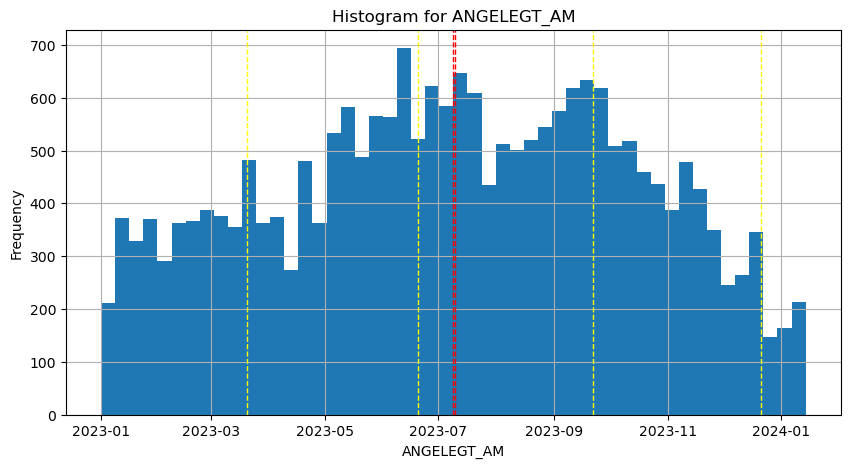

In [866]:
# Plotting histogram for ANGELEGT_AM
plot_histogram(dataset_berlin_fahrraddiebstahl, 'ANGELEGT_AM', bins=50, figsize=(10,5), season_lines=True)

#### Checking TATZEIT_ANFANG_DATUM column

In [867]:
# Changing the data type to datetime for the column TATZEIT_ANFANG_DATUM
dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM'] = pd.to_datetime(dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM'], format='%d.%m.%Y')

# Approving the change of data type for TATZEIT_ANFANG_DATUM column
dataset_berlin_fahrraddiebstahl["TATZEIT_ANFANG_DATUM"].info()

<class 'pandas.core.series.Series'>
Int64Index: 22077 entries, 0 to 22126
Series name: TATZEIT_ANFANG_DATUM
Non-Null Count  Dtype         
--------------  -----         
22077 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 345.0 KB


In [868]:
# Checking min and max values for TATZEIT_ANFANG_DATUM
print("Min value for TATZEIT_ANFANG_DATUM: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM'].min())
print("Max value for TATZEIT_ANFANG_DATUM: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM'].max())

Min value for TATZEIT_ANFANG_DATUM:  2023-01-01 00:00:00
Max value for TATZEIT_ANFANG_DATUM:  2024-01-14 00:00:00


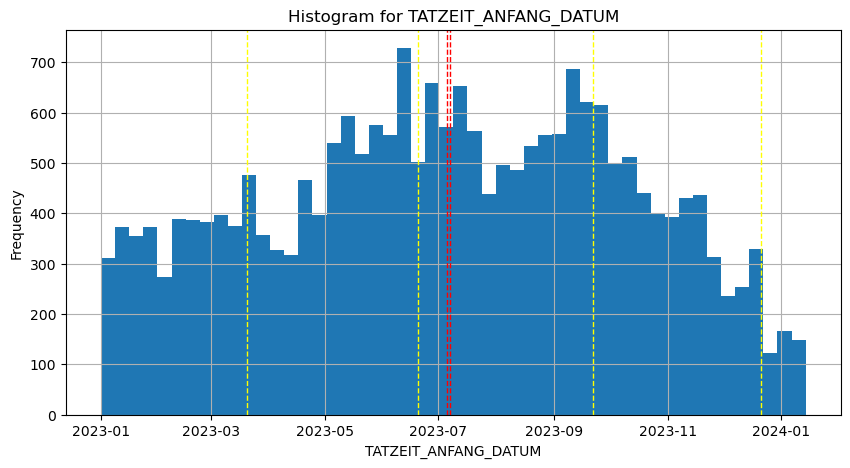

In [869]:
# Plotting histogram for TATZEIT_ANFANG_DATUM
plot_histogram(dataset_berlin_fahrraddiebstahl, 'TATZEIT_ANFANG_DATUM', bins=50, figsize=(10,5), season_lines=True)

#### Checking TATZEIT_ANFANG_STUNDE column

In [870]:
# Checking min and max values for TATZEIT_ANFANG_STUNDE
print("Min value for TATZEIT_ANFANG_STUNDE: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_STUNDE'].min())
print("Max value for TATZEIT_ANFANG_STUNDE: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_STUNDE'].max())

Min value for TATZEIT_ANFANG_STUNDE:  0
Max value for TATZEIT_ANFANG_STUNDE:  23


# BURASI EKLENDI 

In [871]:
# Format the 'TATZEIT_ANFANG_STUNDE' column
dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_STUNDE'] = dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_STUNDE'].apply(lambda x: f"{x:02d}:00")

# Now the DataFrame has an additional column 'formatted_hour' with the time formatted as "HH:00"
print(dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_STUNDE'])

0        17:00
1        16:00
2        15:00
3        20:00
4        17:00
         ...  
22122    08:00
22123    11:00
22124    05:00
22125    12:00
22126    06:00
Name: TATZEIT_ANFANG_STUNDE, Length: 22077, dtype: object


In [872]:
def plot_lineplot(data, column, working_hours=True, parking_hours=False):
    """
    Plots a line plot for a specified column in the dataset.

    :param data: DataFrame containing the data.
    :param column: Column name for which the line plot is to be plotted.
    :param working_hours: Boolean to indicate if lines for standard working hours should be plotted.
    :param parking_hours: Boolean to indicate if shaded regions for standard bike parking hours should be plotted.
    """
    counts = data[column].value_counts().sort_index()
    
    # Creating a lineplot
    sns.lineplot(x=counts.index, y=counts.values)
    
    # Adding significance markers to the plot
    plt.plot(counts.index, counts.values, 's', markersize=4)

    # Adding Working Hour lines
    if working_hours:
        plt.axvline(8, color='red', linestyle='dashed', linewidth=1)
        plt.axvline(16, color='red', linestyle='dashed', linewidth=1)

    # Adding transparent sketches for bike parking hours
    # Shades are added to show the bike parking hours
    if parking_hours:
        plt.axvspan(7, 9, color='blue', alpha=0.2)  # Shaded region from 7 to 9
        plt.axvspan(16, 18, color='blue', alpha=0.2)  # Shaded region from 16 to 18

    # Adding title as well as x and y labels
    plt.title(f'Line Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # Rotate x labels
    plt.xticks(rotation=90)
    plt.show()

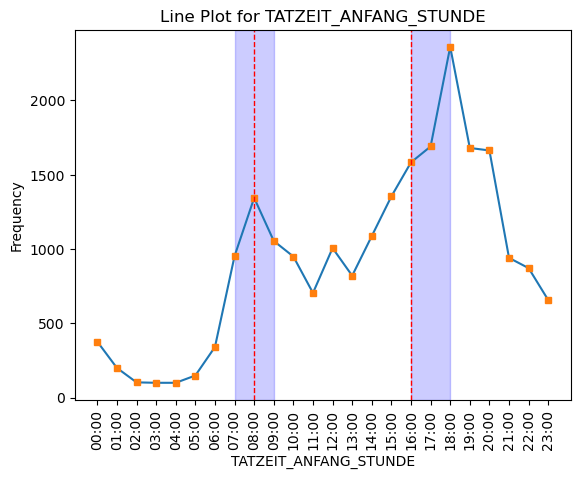

In [873]:
# Plotting lineplot for TATZEIT_ANFANG_DATUM
plot_lineplot(dataset_berlin_fahrraddiebstahl, 'TATZEIT_ANFANG_STUNDE', working_hours=True, parking_hours=True)

#### Checking TATZEIT_ENDE_DATUM column

In [874]:
# Changing the data type to datetime for the column TATZEIT_ENDE_DATUM
dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'] = pd.to_datetime(dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'], format='%d.%m.%Y')

# Approving the change of data type for TATZEIT_ANFANG_DATUM column
dataset_berlin_fahrraddiebstahl["TATZEIT_ENDE_DATUM"].info()

<class 'pandas.core.series.Series'>
Int64Index: 22077 entries, 0 to 22126
Series name: TATZEIT_ENDE_DATUM
Non-Null Count  Dtype         
--------------  -----         
22077 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 345.0 KB


In [875]:
# Checking the first 3 rows of the dataset_berlin_fahrraddiebstahl
dataset_berlin_fahrraddiebstahl.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,bezirk_id,PGR,BZR,PLR,bezirk_name
0,2024-01-14,2024-01-13,17:00,2024-01-14,11,07300515,110,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,7,30,05,15,Tempelhof-Schöneberg
1,2024-01-14,2024-01-13,16:00,2024-01-14,12,08100416,999,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8,10,04,16,Neukölln
2,2024-01-14,2024-01-14,15:00,2024-01-14,20,02500830,399,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2,50,08,30,Friedrichshain-Kreuzberg


In [876]:
# Checking min and max values for TATZEIT_ENDE_DATUM
print("Min value for TATZEIT_ENDE_DATUM: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'].min())
print("Max value for TATZEIT_ENDE_DATUM: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'].max())

Min value for TATZEIT_ENDE_DATUM:  2023-01-01 00:00:00
Max value for TATZEIT_ENDE_DATUM:  2024-01-14 00:00:00


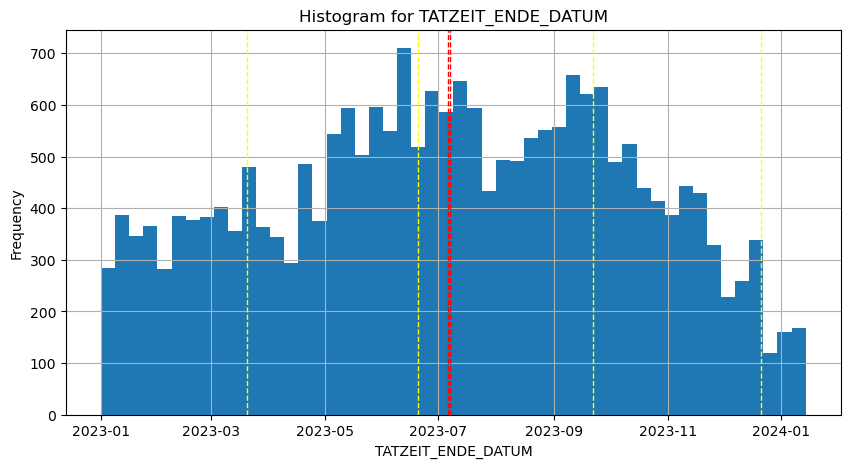

In [877]:
# Plotting histogram for TATZEIT_ENDE_DATUM
plot_histogram(dataset_berlin_fahrraddiebstahl, 'TATZEIT_ENDE_DATUM', bins=50, figsize=(10,5), season_lines=True)

#### Checking TATZEIT_ENDE_STUNDE column

In [878]:
# Checking min and max values for TATZEIT_ENDE_STUNDE
print("Min value for TATZEIT_ENDE_STUNDE: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_STUNDE'].min())
print("Max value for TATZEIT_ENDE_STUNDE: ", dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_STUNDE'].max())

Min value for TATZEIT_ENDE_STUNDE:  0
Max value for TATZEIT_ENDE_STUNDE:  23


In [879]:
# Format the 'TATZEIT_ENDE_STUNDE' column
dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_STUNDE'] = dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_STUNDE'].apply(lambda x: f"{x:02d}:00")

# Now the DataFrame has an additional column 'formatted_hour' with the time formatted as "HH:00"
print(dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_STUNDE'])

0        11:00
1        12:00
2        20:00
3        00:00
4        13:00
         ...  
22122    09:00
22123    11:00
22124    09:00
22125    18:00
22126    12:00
Name: TATZEIT_ENDE_STUNDE, Length: 22077, dtype: object


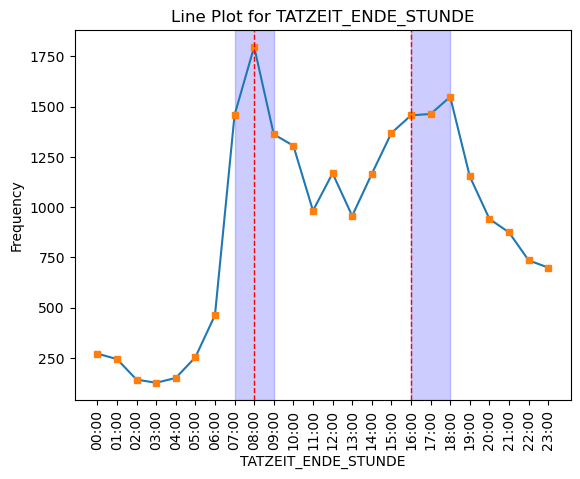

In [880]:
# Plotting lineplot for TATZEIT_ENDE_STUNDE
plot_lineplot(dataset_berlin_fahrraddiebstahl, 'TATZEIT_ENDE_STUNDE', working_hours=True, parking_hours=True)

#### Checking SCHADENSHOEHE column

In [881]:
# Checking the data type of SCHADENSHOEHE column
dataset_berlin_fahrraddiebstahl["SCHADENSHOEHE"].info()

<class 'pandas.core.series.Series'>
Int64Index: 22077 entries, 0 to 22126
Series name: SCHADENSHOEHE
Non-Null Count  Dtype
--------------  -----
22077 non-null  int64
dtypes: int64(1)
memory usage: 345.0 KB


In [882]:
# Printing the first 3 rows of SCHADENSHOEHE column
print(dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].describe())

count    22077.000000
mean      1152.600625
std       1143.071598
min          0.000000
25%        472.000000
50%        799.000000
75%       1399.000000
max      10000.000000
Name: SCHADENSHOEHE, dtype: float64


In [883]:
# Calculating the skewness and kurtosis for SCHADENSHOEHE column
SCHADENSHOEHE_skewness = dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].skew()
SCHADENSHOEHE_kurtosis = dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].kurtosis()

print(f'Skewness: {SCHADENSHOEHE_skewness}')
print(f'Kurtosis: {SCHADENSHOEHE_kurtosis}')

Skewness: 2.675129744421664
Kurtosis: 10.309509302440869


Skewness (2.673797309410892):
A skewness value greater than 0, especially higher than 1, indicates a positively skewed (right-skewed) distribution.
This means that the majority of the data points are concentrated on the lower side of the scale, but there are some exceptionally high values (i.e., a long right tail).
In the context of prices, it suggests that while most of the items have lower prices, there are a few items with very high prices.

Kurtosis (10.302528203073297):
A kurtosis value significantly greater than 0 suggests a leptokurtic distribution.
This type of distribution has a sharper peak and fatter tails compared to a normal distribution.
It indicates that the data has more frequent and severe outliers than a normal distribution would predict.

Implications:
The positive skewness suggests that any mean-based analysis might be skewed by these high-value outliers. The median might be a more representative measure of central tendency for this data.
The high kurtosis value alerts you to the presence of outliers, which might need special attention or treatment, especially in tasks like predictive modeling.
So i decided to choose outliers regarding 4 Sigma rule.

In [884]:
# Calculating mean and standard deviation
mean = dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].mean()
std_dev = dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].std()

# Determining bounds for outliers (4-sigma rule)
schadenshoehe_lower_bound = mean - 4 * std_dev
schadenshoehe_upper_bound = mean + 4 * std_dev

# Identifing outliers
SCHADENSHOEHE_outliers = dataset_berlin_fahrraddiebstahl[(dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'] < schadenshoehe_lower_bound) | (dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'] > schadenshoehe_upper_bound)]

# Saving row numbers of outliers for future removal possibilities
outliers_row_numbers = SCHADENSHOEHE_outliers.index.values.tolist()

# Printing total number of outliers
print('Identified outliers: %d' % SCHADENSHOEHE_outliers.shape[0])

Identified outliers: 221


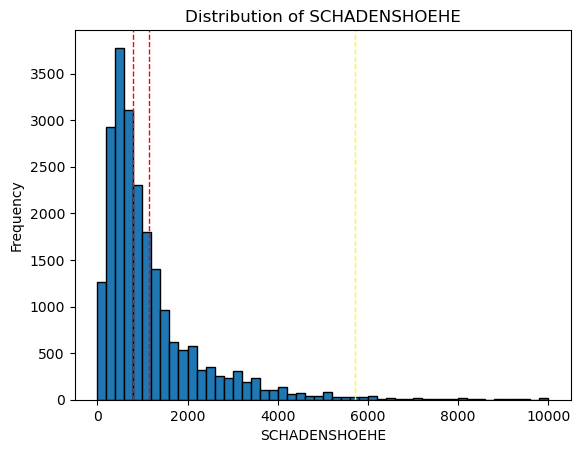

In [885]:
# Creating a histogram for SCHADENSHOEHE with signing the outliers
plt.hist(dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'], bins=50, edgecolor='black')
plt.title('Distribution of SCHADENSHOEHE')
plt.xlabel('SCHADENSHOEHE')
plt.ylabel('Frequency')

# Adding red lines for the mean and median
plt.axvline(dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(dataset_berlin_fahrraddiebstahl['SCHADENSHOEHE'].median(), color='red', linestyle='dashed', linewidth=1)

# Adding yellow lines for the outliers
plt.axvline(schadenshoehe_upper_bound, color='yellow', linestyle='dashed', linewidth=1)
plt.show()

In [886]:
# Printing the shape of the dataset
print("Shape of dataset_berlin_fahrraddiebstahl before dropping outliers: ", dataset_berlin_fahrraddiebstahl.shape)

# Dropping rows which are identified as outliers
dataset_berlin_fahrraddiebstahl.drop(outliers_row_numbers, inplace=True)

# Printing the shape of the dataset
print("Shape of dataset_berlin_fahrraddiebstahl after dropping outliers: ", dataset_berlin_fahrraddiebstahl.shape)

Shape of dataset_berlin_fahrraddiebstahl before dropping outliers:  (22077, 16)
Shape of dataset_berlin_fahrraddiebstahl after dropping outliers:  (21856, 16)


#### Checking VERSUCH column

In [887]:
# Checking the data type of VERSUCH column
dataset_berlin_fahrraddiebstahl["VERSUCH"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21856 entries, 0 to 22126
Series name: VERSUCH
Non-Null Count  Dtype 
--------------  ----- 
21856 non-null  object
dtypes: object(1)
memory usage: 341.5+ KB


In [888]:
# Describing the VERSUCH column
print(dataset_berlin_fahrraddiebstahl['VERSUCH'].describe())

count     21856
unique        3
top        Nein
freq      21751
Name: VERSUCH, dtype: object


In [889]:
# Changing the data type of VERSUCH to category
dataset_berlin_fahrraddiebstahl['VERSUCH'] = dataset_berlin_fahrraddiebstahl['VERSUCH'].astype('category')

In [890]:
# Checking distribution of VERSUCH column
print(dataset_berlin_fahrraddiebstahl['VERSUCH'].value_counts())
print("----------------------------------------------------")

# Checking proportion of VERSUCH column
print(dataset_berlin_fahrraddiebstahl['VERSUCH'].value_counts(normalize=True))


Nein         21751
Ja              96
Unbekannt        9
Name: VERSUCH, dtype: int64
----------------------------------------------------
Nein         0.995196
Ja           0.004392
Unbekannt    0.000412
Name: VERSUCH, dtype: float64


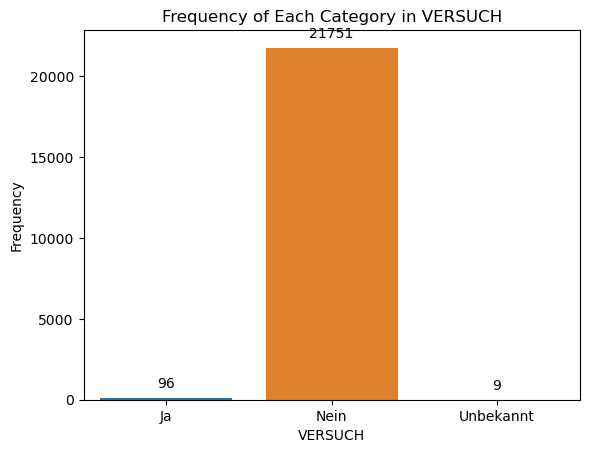

In [891]:
# Creating the bar plot
ax = sns.countplot(x='VERSUCH', data=dataset_berlin_fahrraddiebstahl)
plt.xlabel('VERSUCH')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category in VERSUCH')

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


#### Checking ART_DES_FAHRRADS column

In [892]:
# Checking the data type of ART_DES_FAHRRADS column
dataset_berlin_fahrraddiebstahl["ART_DES_FAHRRADS"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21856 entries, 0 to 22126
Series name: ART_DES_FAHRRADS
Non-Null Count  Dtype 
--------------  ----- 
21856 non-null  object
dtypes: object(1)
memory usage: 341.5+ KB


In [893]:
# Describing the ART_DES_FAHRRADS column
print(dataset_berlin_fahrraddiebstahl['ART_DES_FAHRRADS'].describe())

count             21856
unique                8
top       Herrenfahrrad
freq               9957
Name: ART_DES_FAHRRADS, dtype: object


In [894]:
# Changing the data type of ART_DES_FAHRRADS to category
dataset_berlin_fahrraddiebstahl['ART_DES_FAHRRADS'] = dataset_berlin_fahrraddiebstahl['ART_DES_FAHRRADS'].astype('category')

In [895]:
# Checking distribution of ART_DES_FAHRRADS column
print(dataset_berlin_fahrraddiebstahl['ART_DES_FAHRRADS'].value_counts())
print("----------------------------------------------------")

# Checking proportion of ART_DES_FAHRRADS column
print(dataset_berlin_fahrraddiebstahl['ART_DES_FAHRRADS'].value_counts(normalize=True))

Herrenfahrrad        9957
Damenfahrrad         5732
Fahrrad              3325
Kinderfahrrad         922
Mountainbike          893
diverse Fahrräder     575
Rennrad               387
Lastenfahrrad          65
Name: ART_DES_FAHRRADS, dtype: int64
----------------------------------------------------
Herrenfahrrad        0.455573
Damenfahrrad         0.262262
Fahrrad              0.152132
Kinderfahrrad        0.042185
Mountainbike         0.040858
diverse Fahrräder    0.026309
Rennrad              0.017707
Lastenfahrrad        0.002974
Name: ART_DES_FAHRRADS, dtype: float64


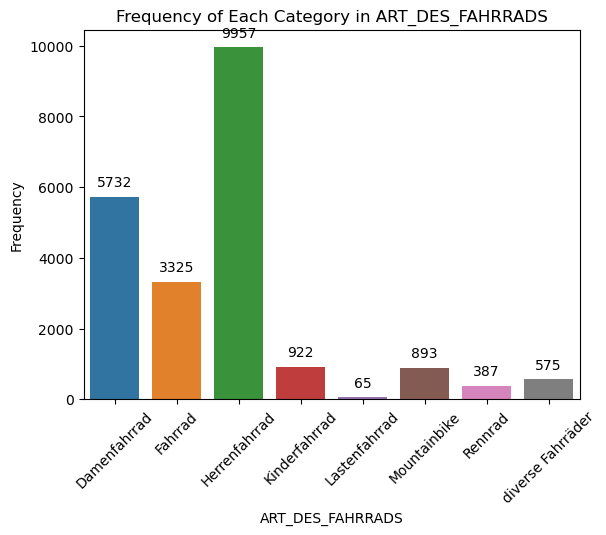

In [896]:
# Creating the bar plot
ax = sns.countplot(x='ART_DES_FAHRRADS', data=dataset_berlin_fahrraddiebstahl)
plt.xlabel('ART_DES_FAHRRADS')

#Rotating the x labels
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Each Category in ART_DES_FAHRRADS')

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Checking DELIKT column

In [897]:
# Checking the data type of DELIKT column
dataset_berlin_fahrraddiebstahl["DELIKT"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21856 entries, 0 to 22126
Series name: DELIKT
Non-Null Count  Dtype 
--------------  ----- 
21856 non-null  object
dtypes: object(1)
memory usage: 341.5+ KB


In [898]:
# Describing the DELIKT column
print(dataset_berlin_fahrraddiebstahl['DELIKT'].describe())

count                21856
unique                   2
top       Fahrraddiebstahl
freq                 20570
Name: DELIKT, dtype: object


In [899]:
# Changing the data type of DELIKT to category
dataset_berlin_fahrraddiebstahl['DELIKT'] = dataset_berlin_fahrraddiebstahl['DELIKT'].astype('category')

In [900]:
# Checking distribution of DELIKT column
print(dataset_berlin_fahrraddiebstahl['DELIKT'].value_counts())
print("----------------------------------------------------")

# Checking proportion of DELIKT column
print(dataset_berlin_fahrraddiebstahl['DELIKT'].value_counts(normalize=True))

Fahrraddiebstahl             20570
Keller- und Bodeneinbruch     1286
Name: DELIKT, dtype: int64
----------------------------------------------------
Fahrraddiebstahl             0.94116
Keller- und Bodeneinbruch    0.05884
Name: DELIKT, dtype: float64


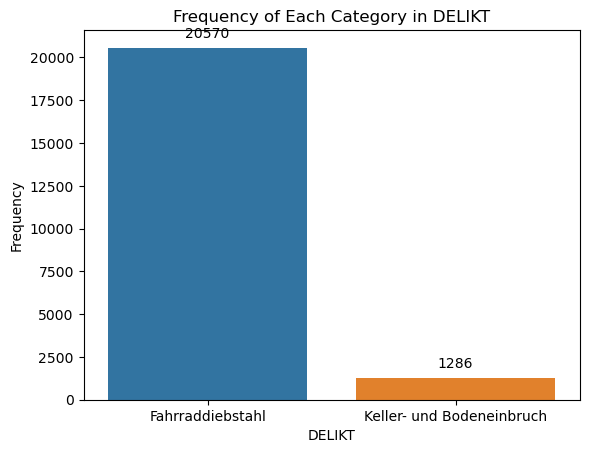

In [901]:
# Creating the bar plot
ax = sns.countplot(x='DELIKT', data=dataset_berlin_fahrraddiebstahl)
plt.xlabel('DELIKT')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category in DELIKT')

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Checking ERFASSUNGSGRUND column

In [902]:
# Checking the data type of ERFASSUNGSGRUND column
dataset_berlin_fahrraddiebstahl["ERFASSUNGSGRUND"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21856 entries, 0 to 22126
Series name: ERFASSUNGSGRUND
Non-Null Count  Dtype 
--------------  ----- 
21856 non-null  object
dtypes: object(1)
memory usage: 341.5+ KB


In [903]:
# Describing the ERFASSUNGSGRUND column
print(dataset_berlin_fahrraddiebstahl['ERFASSUNGSGRUND'].describe())

count                                           21856
unique                                              4
top       Sonstiger schwerer Diebstahl von Fahrrädern
freq                                            19450
Name: ERFASSUNGSGRUND, dtype: object


In [904]:
dataset_berlin_fahrraddiebstahl['ERFASSUNGSGRUND'] = dataset_berlin_fahrraddiebstahl['ERFASSUNGSGRUND'].astype('category')

In [905]:
# Checking distribution of ERFASSUNGSGRUND column
print(dataset_berlin_fahrraddiebstahl['ERFASSUNGSGRUND'].value_counts())
print("----------------------------------------------------")

# Checking proportion of ERFASSUNGSGRUND column
print(dataset_berlin_fahrraddiebstahl['ERFASSUNGSGRUND'].value_counts(normalize=True))

Sonstiger schwerer Diebstahl von Fahrrädern                        19450
Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern     1286
Einfacher Diebstahl von Fahrrädern                                  1073
Einfacher Diebstahl aus Keller/Boden von Fahrrädern                   47
Name: ERFASSUNGSGRUND, dtype: int64
----------------------------------------------------
Sonstiger schwerer Diebstahl von Fahrrädern                        0.889916
Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern    0.058840
Einfacher Diebstahl von Fahrrädern                                 0.049094
Einfacher Diebstahl aus Keller/Boden von Fahrrädern                0.002150
Name: ERFASSUNGSGRUND, dtype: float64


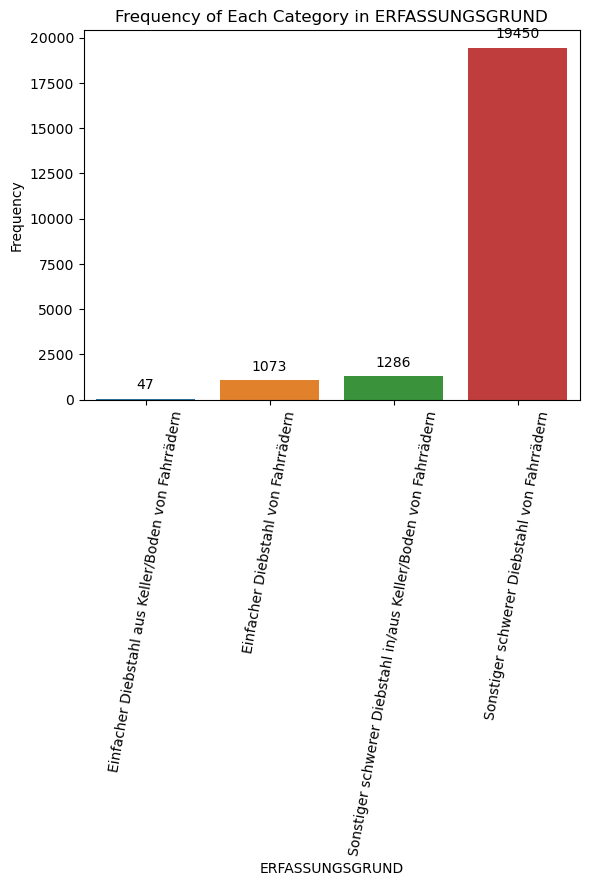

In [906]:
# Creating the bar plot
ax = sns.countplot(x='ERFASSUNGSGRUND', data=dataset_berlin_fahrraddiebstahl)
plt.xlabel('ERFASSUNGSGRUND')

# Rotating the x labels
plt.xticks(rotation=80)
plt.ylabel('Frequency')
plt.title('Frequency of Each Category in ERFASSUNGSGRUND')

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [907]:
# Checking correlation matrix
dataset_berlin_fahrraddiebstahl.corr()

C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_7416\2588556358.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_berlin_fahrraddiebstahl.corr()


,SCHADENSHOEHE
SCHADENSHOEHE,1.0


In [908]:
# Plotting the correlation matrix
dataset_berlin_fahrraddiebstahl.head(2)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,bezirk_id,PGR,BZR,PLR,bezirk_name
0,2024-01-14,2024-01-13,17:00,2024-01-14,11:00,07300515,110,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,7,30,05,15,Tempelhof-Schöneberg
1,2024-01-14,2024-01-13,16:00,2024-01-14,12:00,08100416,999,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8,10,04,16,Neukölln


In [909]:
# WARNING: The following code block updates the hour in TATZEIT_ANFANG_DATUM and TATZEIT_ENDE_DATUM,
# and removes the TATZEIT_ANFANG_STUNDE and TATZEIT_ENDE_STUNDE columns.
# Set this to True if you need to perform the update and removal
perform_update = False

if perform_update:
    # Updating the hour in TATZEIT_ANFANG_DATUM with the hour from TATZEIT_ANFANG_STUNDE
    dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM'] = dataset_berlin_fahrraddiebstahl.apply(
        lambda row: row['TATZEIT_ANFANG_DATUM'].replace(hour=int(row['TATZEIT_ANFANG_STUNDE'])), axis=1
    )

    # Updating the hour in TATZEIT_ENDE_DATUM with the hour from TATZEIT_ENDE_STUNDE
    dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'] = dataset_berlin_fahrraddiebstahl.apply(
        lambda row: row['TATZEIT_ENDE_DATUM'].replace(hour=int(row['TATZEIT_ENDE_STUNDE'])), axis=1
    )

    # Removing TATZEIT_ANFANG_STUNDE and TATZEIT_ENDE_STUNDE columns
    dataset_berlin_fahrraddiebstahl.drop(columns=['TATZEIT_ANFANG_STUNDE', 'TATZEIT_ENDE_STUNDE'], inplace=True)

    # Checking the first few rows to confirm the change
    print(dataset_berlin_fahrraddiebstahl.head(3))

In [910]:
# Checking time difference between TATZEIT_ANFANG_DATUM and TATZEIT_ENDE_DATUM
dataset_berlin_fahrraddiebstahl['ZEITUNTERSCHIED'] = dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'] - dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM']
# Checking the first few rows to confirm the change
dataset_berlin_fahrraddiebstahl.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,bezirk_id,PGR,BZR,PLR,bezirk_name,ZEITUNTERSCHIED
0,2024-01-14,2024-01-13,17:00,2024-01-14,11:00,07300515,110,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,7,30,05,15,Tempelhof-Schöneberg,1 days
1,2024-01-14,2024-01-13,16:00,2024-01-14,12:00,08100416,999,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8,10,04,16,Neukölln,1 days
2,2024-01-14,2024-01-14,15:00,2024-01-14,20:00,02500830,399,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2,50,08,30,Friedrichshain-Kreuzberg,0 days


In [911]:
# Checking min and max values for ZEITUNTERSCHIED
print("Min value for ZEITUNTERSCHIED: ", dataset_berlin_fahrraddiebstahl['ZEITUNTERSCHIED'].min())
print("Max value for ZEITUNTERSCHIED: ", dataset_berlin_fahrraddiebstahl['ZEITUNTERSCHIED'].max())

Min value for ZEITUNTERSCHIED:  0 days 00:00:00
Max value for ZEITUNTERSCHIED:  3 days 00:00:00


Max value for ZEITUNTERSCHIED is consistent with data on source website

In [912]:
# Calculating time difference between ANGELEGT_AM and TATZEIT_ANFANG_DATUM without hours
dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'] = dataset_berlin_fahrraddiebstahl['ANGELEGT_AM'].dt.date - dataset_berlin_fahrraddiebstahl['TATZEIT_ENDE_DATUM'].dt.date

# Checking min and max values for ZEIT_BIS_TATZEIT
print("Min value for ZEIT_BIS_TATZEIT: ", dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].min())
print("Max value for ZEIT_BIS_TATZEIT: ", dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].max())

Min value for ZEIT_BIS_TATZEIT:  -1 days +00:00:00
Max value for ZEIT_BIS_TATZEIT:  369 days 00:00:00


Theft cannot be recorded before it occurres. Therefore, where ZEIT_BIS_TATZEIT data has a negative value, the ANGELEGT_AM value will be equalised to TATZEIT_ENDE_DATUM.

In [913]:
# Showing quantity of negative values for ZEIT_BIS_TATZEIT
print("Quantity of negative values for ZEIT_BIS_TATZEIT: ", dataset_berlin_fahrraddiebstahl[dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'] < datetime.timedelta(0)].shape[0])
# Identifying row numbers of negative values for ZEIT_BIS_TATZEIT
print("Row numbers of negative values for ZEIT_BIS_TATZEIT: ", dataset_berlin_fahrraddiebstahl[dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'] < datetime.timedelta(0)].index.values.tolist())

Quantity of negative values for ZEIT_BIS_TATZEIT:  3
Row numbers of negative values for ZEIT_BIS_TATZEIT:  [3124, 3159, 13692]


In [914]:
# Printing ANGELEGT_AM and TATZEIT_ENDE_DATUM columns of [3124, 3159, 13692] to change them.
print(dataset_berlin_fahrraddiebstahl.loc[[3124, 3159, 13692], ['ANGELEGT_AM', 'TATZEIT_ENDE_DATUM']])

      ANGELEGT_AM TATZEIT_ENDE_DATUM
3124   2023-10-28         2023-10-29
3159   2023-10-28         2023-10-29
13692  2023-06-08         2023-06-09


In [915]:
# Changing the row 3124 of ANGELEGT_AM to 2023-10-29
dataset_berlin_fahrraddiebstahl.loc[3124, 'ANGELEGT_AM'] = pd.to_datetime('2023-10-29')

# Changing the row 3159 of ANGELEGT_AM to 2023-10-29
dataset_berlin_fahrraddiebstahl.loc[3159, 'ANGELEGT_AM'] = pd.to_datetime('2023-10-29')

# Changing the row 13692 of ANGELEGT_AM to 2023-06-09
dataset_berlin_fahrraddiebstahl.loc[13692, 'ANGELEGT_AM'] = pd.to_datetime('2023-06-09')

In [916]:
# Calculating time difference between ANGELEGT_AM and TATZEIT_ANFANG_DATUM without hours
dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'] = dataset_berlin_fahrraddiebstahl['ANGELEGT_AM'].dt.date - dataset_berlin_fahrraddiebstahl['TATZEIT_ANFANG_DATUM'].dt.date

# Checking min and max values for ZEIT_BIS_TATZEIT
print("Min value for ZEIT_BIS_TATZEIT: ", dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].min())
print("Max value for ZEIT_BIS_TATZEIT: ", dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].max())

Min value for ZEIT_BIS_TATZEIT:  0 days 00:00:00
Max value for ZEIT_BIS_TATZEIT:  370 days 00:00:00


In [917]:
# Calculating outliers for ZEIT_BIS_TATZEIT regarding the 4-sigma rule
ZEIT_BIS_TATZEIT_mean = dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].mean()
ZEIT_BIS_TATZEIT_std_dev = dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].std()

# Determining bounds for outliers (4-sigma rule)
zeit_bis_tatzeit_lower_bound = ZEIT_BIS_TATZEIT_mean - 4 * ZEIT_BIS_TATZEIT_std_dev
zeit_bis_tatzeit_upper_bound = ZEIT_BIS_TATZEIT_mean + 4 * ZEIT_BIS_TATZEIT_std_dev

# Identifying outliers
ZEIT_BIS_TATZEIT_outliers = dataset_berlin_fahrraddiebstahl[(dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'] < zeit_bis_tatzeit_lower_bound) | (dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'] > zeit_bis_tatzeit_upper_bound)]

# Saving row numbers of outliers
ZEIT_BIS_TATZEIT_outliers_row_numbers = ZEIT_BIS_TATZEIT_outliers.index.values.tolist()

# Printing total number of outliers
print('Identified outliers: %d' % ZEIT_BIS_TATZEIT_outliers.shape[0])

Identified outliers: 168


Outliers could be removed however it is decided to hold them not to lose valuable data.
If needed please return the remove_outliers to True in the following code.

In [918]:
# WARNING: The following code block outlier removal in ZEIT_BIS_TATZEIT column,
# Set this to True if you need to perform the outlier removal
remove_outliers = False

if remove_outliers:
    # Removing outliers from the dataset
    dataset_berlin_fahrraddiebstahl = dataset_berlin_fahrraddiebstahl.drop(ZEIT_BIS_TATZEIT_outliers_row_numbers)

    # Optionally, reseting the index of the DataFrame
    dataset_berlin_fahrraddiebstahl = dataset_berlin_fahrraddiebstahl.reset_index(drop=True)

    print('Outliers have been removed.')

In [919]:
# Checking distribution of ZEIT_BIS_TATZEIT column
print(dataset_berlin_fahrraddiebstahl['ZEIT_BIS_TATZEIT'].value_counts())

1 days      8036
0 days      5365
2 days      3237
3 days      1774
4 days       746
            ... 
113 days       1
120 days       1
129 days       1
153 days       1
66 days        1
Name: ZEIT_BIS_TATZEIT, Length: 143, dtype: int64


In [920]:
# Removing LOR, PGR, BZR, PLR columns
dataset_berlin_fahrraddiebstahl.drop(['LOR', 'PGR', 'BZR', 'PLR'], axis=1, inplace=True)

#### Last check of the dataset_berlin_fahrraddiebstahl

In [921]:
# Checking of the dataset_berlin_fahrraddiebstahl
dataset_berlin_fahrraddiebstahl.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,bezirk_id,bezirk_name,ZEITUNTERSCHIED,ZEIT_BIS_TATZEIT
0,2024-01-14,2024-01-13,17:00,2024-01-14,11:00,110,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,7,Tempelhof-Schöneberg,1 days,1 days
1,2024-01-14,2024-01-13,16:00,2024-01-14,12:00,999,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8,Neukölln,1 days,1 days
2,2024-01-14,2024-01-14,15:00,2024-01-14,20:00,399,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2,Friedrichshain-Kreuzberg,0 days,0 days


In [922]:
# Checking information of the dataset_berlin_fahrraddiebstahl
dataset_berlin_fahrraddiebstahl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21856 entries, 0 to 22126
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   ANGELEGT_AM            21856 non-null  datetime64[ns] 
 1   TATZEIT_ANFANG_DATUM   21856 non-null  datetime64[ns] 
 2   TATZEIT_ANFANG_STUNDE  21856 non-null  object         
 3   TATZEIT_ENDE_DATUM     21856 non-null  datetime64[ns] 
 4   TATZEIT_ENDE_STUNDE    21856 non-null  object         
 5   SCHADENSHOEHE          21856 non-null  int64          
 6   VERSUCH                21856 non-null  category       
 7   ART_DES_FAHRRADS       21856 non-null  category       
 8   DELIKT                 21856 non-null  category       
 9   ERFASSUNGSGRUND        21856 non-null  category       
 10  bezirk_id              21856 non-null  category       
 11  bezirk_name            21856 non-null  object         
 12  ZEITUNTERSCHIED        21856 non-null  timedel

In [923]:
# Printing row counts before and after merge
print("Before merge:")
print("dataset_berlin row count:", dataset_berlin.shape[0])
print("dataset_fahrraddiebstahl row count:", dataset_fahrraddiebstahl.shape[0])
print("After merge:")
print("dataset_berlin_fahrraddiebstahl row count:", dataset_berlin_fahrraddiebstahl.shape[0])
print("----------------------------------------")

# Checking for null values in the merged dataset
print("\nNull values in merged dataset:")
print(dataset_berlin_fahrraddiebstahl.isnull().sum())
print("----------------------------------------")

# Checking if all bezirk_id values in the merged dataset exist in the original dataset
invalid_bezirk_ids = dataset_berlin_fahrraddiebstahl[~dataset_berlin_fahrraddiebstahl['bezirk_id'].isin(dataset_berlin['bezirk_id'])]
print("Number of records with invalid bezirk_id:", invalid_bezirk_ids.shape[0])

Before merge:
dataset_berlin row count: 12
dataset_fahrraddiebstahl row count: 22127
After merge:
dataset_berlin_fahrraddiebstahl row count: 21856
----------------------------------------

Null values in merged dataset:
ANGELEGT_AM              0
TATZEIT_ANFANG_DATUM     0
TATZEIT_ANFANG_STUNDE    0
TATZEIT_ENDE_DATUM       0
TATZEIT_ENDE_STUNDE      0
SCHADENSHOEHE            0
VERSUCH                  0
ART_DES_FAHRRADS         0
DELIKT                   0
ERFASSUNGSGRUND          0
bezirk_id                0
bezirk_name              0
ZEITUNTERSCHIED          0
ZEIT_BIS_TATZEIT         0
dtype: int64
----------------------------------------
Number of records with invalid bezirk_id: 0


In [924]:
# Printing the shape of dataset_berlin_fahrraddiebstahl
print("Shape of dataset_berlin_fahrraddiebstahl: ", dataset_berlin_fahrraddiebstahl.shape)

Shape of dataset_berlin_fahrraddiebstahl:  (21856, 14)


In [925]:
# Creating random sample rows for manual inspection
print("\nSample rows from merged dataset:")
print(dataset_berlin_fahrraddiebstahl.sample(5))


Sample rows from merged dataset:
      ANGELEGT_AM TATZEIT_ANFANG_DATUM TATZEIT_ANFANG_STUNDE  \
716    2023-12-18           2023-12-18                 18:00   
8805   2023-08-11           2023-08-10                 18:00   
1207   2023-12-05           2023-11-13                 19:00   
11389  2023-07-06           2023-07-03                 12:00   
3097   2023-10-29           2023-10-28                 16:00   

      TATZEIT_ENDE_DATUM TATZEIT_ENDE_STUNDE  SCHADENSHOEHE VERSUCH  \
716           2023-12-18               19:00            550    Nein   
8805          2023-08-10               23:00            299    Nein   
1207          2023-11-14               07:00           1050    Nein   
11389         2023-07-04               10:00           1600    Nein   
3097          2023-10-29               13:00           4500    Nein   

      ART_DES_FAHRRADS                     DELIKT  \
716      Herrenfahrrad  Keller- und Bodeneinbruch   
8805           Rennrad           Fahrraddiebstah

In [926]:
# Comparing datasets before and after merge
print("\nAggregated statistics comparison:")
print("dataset_berlin statistics:")
print(dataset_berlin.describe())
print("----------------------------------------")
print("\ndataset_fahrraddiebstahl statistics:")
print(dataset_fahrraddiebstahl.describe())
print("----------------------------------------")
print("\ndataset_berlin_fahrraddiebstahl statistics:")
print(dataset_berlin_fahrraddiebstahl.describe())


Aggregated statistics comparison:
dataset_berlin statistics:
        bezirk_id bezirk_name
count          12          12
unique         12          12
top             1       Mitte
freq            1           1
----------------------------------------

dataset_fahrraddiebstahl statistics:
       TATZEIT_ANFANG_STUNDE  TATZEIT_ENDE_STUNDE  SCHADENSHOEHE
count           22127.000000         22127.000000   22127.000000
mean               14.582591            13.438650    1151.737967
std                 5.369114             5.422444    1142.846193
min                 0.000000             0.000000       0.000000
25%                10.000000             9.000000     470.000000
50%                16.000000            14.000000     799.000000
75%                19.000000            18.000000    1399.000000
max                23.000000            23.000000   10000.000000
----------------------------------------

dataset_berlin_fahrraddiebstahl statistics:
       SCHADENSHOEHE            ZEITUN

In [927]:
# Saving the dataset_berlin_fahrraddiebstahl as a csv file to ../data folder
dataset_berlin_fahrraddiebstahl.to_csv('../data/dataset_berlin_fahrraddiebstahl.csv', index=False)